In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Practice 1

In [87]:
X, y = datasets.load_diabetes(return_X_y=True)
#X = X[:309]
#y = y[:309]

In [155]:
from rich import inspect
import toolz as tz

In [ ]:
tz.pipe(X,
       lambda x: pd.DataFrame(x),
       )

In [13]:
inspect(Lasso, methods = True)

╭─────────────────────────── <class 'sklearn.linear_model._coordinate_descent.Lasso'> ────────────────────────────╮
│ class Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,         │
│ warm_start=False, positive=False, random_state=None, selection='cyclic'):                                       │
│                                                                                                                 │
│ Linear Model trained with L1 prior as regularizer (aka the Lasso).                                              │
│                                                                                                                 │
│         sparse_coef_ = <property object at 0x000002732D2A6D90>                                                  │
│                  fit = def fit(self, X, y, sample_weight=None, check_input=True): Fit model with coordinate     │
│                        descent.                                                                                 │
│ get_metadata_routing = def get_metadata_routing(self): Get metadata routing of this object.                     │
│           get_params = def get_params(self, deep=True): Get parameters for this estimator.                      │
│                 path = def path(X, y, *, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, precompute='auto', │
│                        Xy=None, copy_X=True, coef_init=None, verbose=False, return_n_iter=False,                │
│                        positive=False, check_input=True, **params): Compute elastic net path with coordinate    │
│                        descent.                                                                                 │
│              predict = def predict(self, X): Predict using the linear model.                                    │
│                score = def score(self, X, y, sample_weight=None): Return the coefficient of determination of    │
│                        the prediction.                                                                          │
│      set_fit_request = def set_fit_request(self: sklearn.linear_model._coordinate_descent.Lasso, *,             │
│                        check_input: Union[bool, NoneType, str] = '$UNCHANGED$', sample_weight: Union[bool,      │
│                        NoneType, str] = '$UNCHANGED$') -> sklearn.linear_model._coordinate_descent.Lasso:       │
│                        Request metadata passed to the ``fit`` method.                                           │
│           set_params = def set_params(self, **params): Set the parameters of this estimator.                    │
│    set_score_request = def set_score_request(self: sklearn.linear_model._coordinate_descent.Lasso, *,           │
│                        sample_weight: Union[bool, NoneType, str] = '$UNCHANGED$') ->                            │
│                        sklearn.linear_model._coordinate_descent.Lasso: Request metadata passed to the ``score`` │
│                        method.                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [4]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126.])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [89]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
len(X_train)

309

In [61]:
#alphas = np.linspace(0,5,100)
alpha = 0.1

In [62]:
Lasso = linear_model.Lasso(alpha = alpha).fit(X_train, y_train)

In [109]:
grid={
    'alpha': np.linspace(0,50,1000)
}

In [102]:
scorers = {
    'mse': make_scorer(mean_squared_error, greater_is_better = False),
    'mae': make_scorer(mean_absolute_error, greater_is_better = False)
        }

In [110]:
GS = GridSearchCV(Lasso(), grid, cv=LeaveOneOut(), n_jobs=-1, 
             scoring=scorers, refit = 'mse' ).fit(X_train, y_train)


In [112]:
GS.best_params_

{'alpha': 0.1001001001001001}

In [105]:
results_df = pd.DataFrame(GS.cv_results_)
pd.set_option('display.max_columns', None)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_mse,split1_test_mse,split2_test_mse,split3_test_mse,split4_test_mse,split5_test_mse,split6_test_mse,split7_test_mse,split8_test_mse,split9_test_mse,split10_test_mse,split11_test_mse,split12_test_mse,split13_test_mse,split14_test_mse,split15_test_mse,split16_test_mse,split17_test_mse,split18_test_mse,split19_test_mse,split20_test_mse,split21_test_mse,split22_test_mse,split23_test_mse,split24_test_mse,split25_test_mse,split26_test_mse,split27_test_mse,split28_test_mse,split29_test_mse,split30_test_mse,split31_test_mse,split32_test_mse,split33_test_mse,split34_test_mse,split35_test_mse,split36_test_mse,split37_test_mse,split38_test_mse,split39_test_mse,split40_test_mse,split41_test_mse,split42_test_mse,split43_test_mse,split44_test_mse,split45_test_mse,split46_test_mse,split47_test_mse,split48_test_mse,split49_test_mse,split50_test_mse,split51_test_mse,split52_test_mse,split53_test_mse,split54_test_mse,split55_test_mse,split56_test_mse,split57_test_mse,split58_test_mse,split59_test_mse,split60_test_mse,split61_test_mse,split62_test_mse,split63_test_mse,split64_test_mse,split65_test_mse,split66_test_mse,split67_test_mse,split68_test_mse,split69_test_mse,split70_test_mse,split71_test_mse,split72_test_mse,split73_test_mse,split74_test_mse,split75_test_mse,split76_test_mse,split77_test_mse,split78_test_mse,split79_test_mse,split80_test_mse,split81_test_mse,split82_test_mse,split83_test_mse,split84_test_mse,split85_test_mse,split86_test_mse,split87_test_mse,split88_test_mse,split89_test_mse,split90_test_mse,split91_test_mse,split92_test_mse,split93_test_mse,split94_test_mse,split95_test_mse,split96_test_mse,split97_test_mse,split98_test_mse,split99_test_mse,split100_test_mse,split101_test_mse,split102_test_mse,split103_test_mse,split104_test_mse,split105_test_mse,split106_test_mse,split107_test_mse,split108_test_mse,split109_test_mse,split110_test_mse,split111_test_mse,split112_test_mse,split113_test_mse,split114_test_mse,split115_test_mse,split116_test_mse,split117_test_mse,split118_test_mse,split119_test_mse,split120_test_mse,split121_test_mse,split122_test_mse,split123_test_mse,split124_test_mse,split125_test_mse,split126_test_mse,split127_test_mse,split128_test_mse,split129_test_mse,split130_test_mse,split131_test_mse,split132_test_mse,split133_test_mse,split134_test_mse,split135_test_mse,split136_test_mse,split137_test_mse,split138_test_mse,split139_test_mse,split140_test_mse,split141_test_mse,split142_test_mse,split143_test_mse,split144_test_mse,split145_test_mse,split146_test_mse,split147_test_mse,split148_test_mse,split149_test_mse,split150_test_mse,split151_test_mse,split152_test_mse,split153_test_mse,split154_test_mse,split155_test_mse,split156_test_mse,split157_test_mse,split158_test_mse,split159_test_mse,split160_test_mse,split161_test_mse,split162_test_mse,split163_test_mse,split164_test_mse,split165_test_mse,split166_test_mse,split167_test_mse,split168_test_mse,split169_test_mse,split170_test_mse,split171_test_mse,split172_test_mse,split173_test_mse,split174_test_mse,split175_test_mse,split176_test_mse,split177_test_mse,split178_test_mse,split179_test_mse,split180_test_mse,split181_test_mse,split182_test_mse,split183_test_mse,split184_test_mse,split185_test_mse,split186_test_mse,split187_test_mse,split188_test_mse,split189_test_mse,split190_test_mse,split191_test_mse,split192_test_mse,split193_test_mse,split194_test_mse,split195_test_mse,split196_test_mse,split197_test_mse,split198_test_mse,split199_test_mse,split200_test_mse,split201_test_mse,split202_test_mse,split203_test_mse,split204_test_mse,split205_test_mse,split206_test_mse,split207_test_mse,split208_test_mse,split209_test_mse,split210_test_mse,split211_test_mse,split212_test_mse,split213_test_mse,split214_test_mse,split215_test_mse,split216_test_mse,split217_test_mse,split218_test_mse,split219_test_mse,split220_test_mse,split221_test_mse,split222_test_mse,split223_test_mse,

In [73]:
results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_mse', 'split1_test_mse',
       'split2_test_mse', 'split3_test_mse',
       ...
       'split98_test_mae', 'split99_test_mae', 'split100_test_mae',
       'split101_test_mae', 'split102_test_mae', 'split103_test_mae',
       'split104_test_mae', 'mean_test_mae', 'std_test_mae', 'rank_test_mae'],
      dtype='object', length=222)

In [ ]:
import seaborn as sns


fig, ax = plt.subplots
sns.lineplot(
    
    )

Text(0, 0.5, 'MSE')

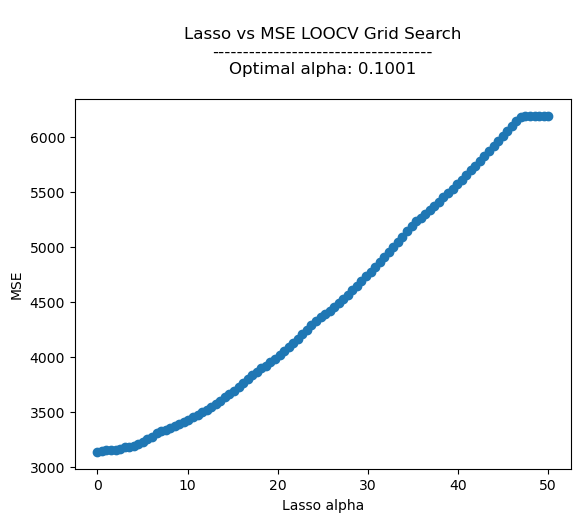

In [113]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    results_df['param_alpha'],
    -1 * results_df['mean_test_mse'],
    marker = 'o'
    )

tmp = f"""
Lasso vs MSE LOOCV Grid Search
------------------------------------
Optimal alpha: {GS.best_params_['alpha']:0.4f}
"""
ax.set_title(tmp)
ax.set_xlabel('Lasso alpha')
ax.set_xlabel('Lasso alpha')
ax.set_ylabel('MSE')

In [ ]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

### Practice 2

$$
y = \sin(x) + \epsilon\\
\epsilon \sim N(0,1)
$$

In [131]:
from sklearn.neural_network import MLPRegressor
import scipy.stats as stats
import itertools as it

In [138]:
n_sim = 1_000
e = stats.norm(0,1).rvs(n_sim, random_state =42).reshape(-1,1)
x = np.linspace(0, 10, n_sim).reshape(-1,1)
y = np.sin(x) + e

In [ ]:
y_real = np.sin(x)

In [139]:
e.shape

(1000, 1)

In [ ]:
plt.plot(x, y, 'o')
plt.title('$y=\sin(x)+\epsilon$')
plt.plot(x, y_real)
plt.xlabel('$x$')
plt.ylabel('$y$')

In [140]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [181]:
scorers = {
    'mse': make_scorer(mean_squared_error, greater_is_better = False)
}

grid = {
    'hidden_layer_sizes':[(x, x, x, x, x, x, x, x, x, x, x, x, x, x, x, x) for x in range(1, 101, 10)],
    'activation': ['relu'],
    'solver':['sgd'],
    'max_iter': [1000],
    'learning_rate_init':[0.01]
}

In [182]:
nn_cv = GridSearchCV(
    MLPRegressor(),
    grid,
    cv=5, 
    scoring=scorers,
    refit = 'mse',
    n_jobs=-1
    )

In [183]:
nn = nn_cv.fit(X_train, y_train)

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [184]:
nn.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (91,
  91,
  91,
  91,
  91,
  91,
  91,
  91,
  91,
  91,
  91,
  91,
  91,
  91,
  91,
  91),
 'learning_rate_init': 0.01,
 'max_iter': 1000,
 'solver': 'sgd'}

In [153]:
# y_real = np.sin(np.sort(X_train))
# y_sim = nn.predict(np.sort(X_train))

In [185]:
y_sim = tz.pipe(X_train, 
        lambda x: np.sort(x),
        lambda x: nn.predict(x)
        )
y_real = tz.pipe(X_train,
        lambda x: np.sort(x),
        lambda x: np.sin(x)
        ) 

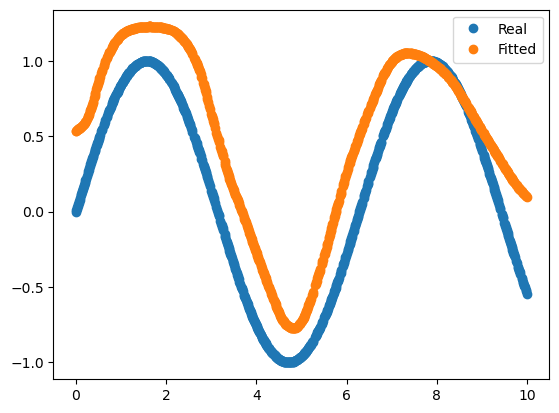

In [186]:
plt.plot(np.sort(X_train), y_real, 'o', label = "Real")
plt.plot(np.sort(X_train), y_sim, 'o', label = 'Fitted')
plt.legend()

In [ ]:
#StandardScaler()

### Practice 3

In [218]:
from icecream import ic
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [194]:
centers = np.array(
    [
    [0,0],
    [0, 100],
    [100,100],
    [100,0],
    ]
)

In [210]:
n_obs = 100

X = np.empty((0,2))
label = []
for i, center in enumerate(centers):
    x1 = np.random.normal(center[0], 20, n_obs)
    x2 = np.random.normal(center[1], 20, n_obs)
    label += [i]* n_obs
    X = np.vstack((X, np.column_stack((x1,x2))))

In [213]:
data = pd.DataFrame(X, columns = ["x1","x2"])
data['label'] = label
data['label'] = data['label'].astype('category')
data = data.sample(frac=1).reset_index(drop=True)

In [207]:
import seaborn as sns

<Axes: xlabel='x1', ylabel='x2'>

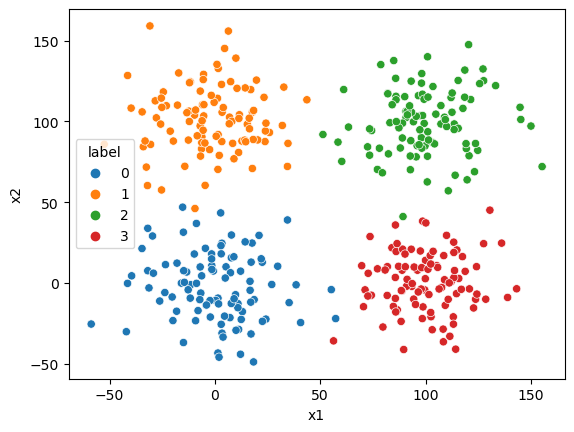

In [214]:
sns.scatterplot(data=data, x= "x1", y="x2", hue = 'label')

In [219]:
from sklearn.pipeline import Pipeline

km = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('kmeans', KMeans())
        
    ]
    )

In [225]:
grid = {
        'kmeans__n_clusters': list(range(1, 21))
        #'kmeans'
}

In [226]:
km_cv = GridSearchCV(km, grid, cv=10, n_jobs=-1)

In [228]:
km_cv.fit(data[['x1', 'x2']])

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kmeans', KMeans())]),
             n_jobs=-1,
             param_grid={'kmeans__n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20]})

In [229]:
km_cv.best_params_

{'kmeans__n_clusters': 20}

In [232]:
results_df = pd.DataFrame(km_cv.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kmeans__n_clusters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.492528,0.115382,0.048376,0.016195,1,{'kmeans__n_clusters': 1},-78.816205,-82.780648,-80.282938,-82.331512,-82.732594,-82.507453,-79.410942,-81.812232,-85.237751,-69.077424,-80.498970,4.198594,20
1,0.502477,0.053409,0.053278,0.017278,2,{'kmeans__n_clusters': 2},-42.982928,-46.101807,-43.090183,-45.466193,-43.918253,-51.732406,-53.288521,-44.803892,-44.649816,-38.845728,-45.487973,3.999967,19
2,0.557304,0.064573,0.051471,0.023911,3,{'kmeans__n_clusters': 3},-24.660786,-28.262419,-36.788254,-29.555712,-30.095946,-32.483819,-40.507959,-30.373482,-28.931162,-23.947465,-30.560700,4.787183,18
3,0.522172,0.129366,0.052412,0.016374,4,{'kmeans__n_clusters': 4},-7.771409,-14.283127,-10.343400,-11.255261,-7.699668,-9.264872,-10.535757,-11.706561,-8.203172,-11.311437,-10.237466,1.960135,17
4,0.505118,0.051414,0.058873,0.014155,5,{'kmeans__n_clusters': 5},-6.447787,-12.687585,-9.767317,-10.172052,-7.643832,-9.166206,-9.362034,-11.383127,-7.297314,-10.654807,-9.458206,1.824547,16
5,0.546966,0.040601,0.045556,0.018183,6,{'kmeans__n_clusters': 6},-6.223297,-11.548803,-8.326497,-9.000686,-7.336297,-8.403409,-8.226438,-11.067193,-7.072280,-10.351118,-8.755602,1.661322,15
6,0.556011,0.089150,0.047117,0.022638,7,{'kmeans__n_clusters': 7},-5.216798,-11.433328,-7.988483,-8.597138,-6.757550,-7.714582,-7.835014,-9.313514,-6.860221,-9.280554,-8.099718,1.615791,14
7,0.604253,0.169864,0.043741,0.019496,8,{'kmeans__n_clusters': 8},-4.723348,-9.590963,-7.293798,-7.347469,-5.654835,-7.201716,-7.950009,-8.991913,-5.612953,-8.195382,-7.256239,1.466967,13
8,0.570923,0.110471,0.069041,0.027913,9,{'kmeans__n_clusters': 9},-4.614473,-9.380760,-6.567109,-7.038281,-5.728245,-7.085586,-6.848546,-7.983202,-5.305754,-8.490585,-6.904254,1.384289,12
9,0.544434,0.108137,0.046917,0.012184,10,{'kmeans__n_clusters': 10},-3.994787,-8.272681,-5.620260,-6.628710,-3.970428,-6.443690,-5.836434,-7.548397,-5.601650,-8.234363,-6.215140,1.454440,11


In [ ]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [ ]:
## Think of the each point on our elbow graph as expressing the variation in the spread 

# bias - variance tradeoff

Text(0.5, 1.0, 'Elbow Plot')

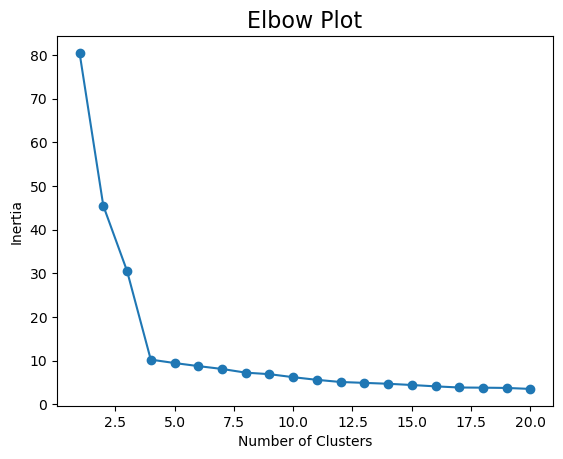

In [241]:
fig, ax = plt.subplots()
ax.plot(
    results_df['param_kmeans__n_clusters'],
    -1 * results_df['mean_test_score'],
    marker = "o"
    )

ax.set_xlabel('Number of Clusters')    
ax.set_ylabel('Inertia')
#ax.axis([2,4.5, 0,100])
ax.set_title("Elbow Plot", fontsize =16)

In [234]:
KMeans

AttributeError: 'GridSearchCV' object has no attribute 'inertia_'